<a id="Header"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#0D4C92;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align:center;
          color:white;">
          CRM GROUP PROJECT
</p>
</div>

<p style="text-align:center">
    <img src="https://www.digitalvidya.com/blog/wp-content/uploads/2019/03/Marketing-Analytics.jpg" width="900" alt="Water"  />
    </a>
</p>

<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#59C1BD;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align:center;
          color:white;">
          INTRODUCTION
</p>
</div>

<li><b> DATASET</b></li> 
Marketing Campaign. Boost the profit of a marketing campaign: https://www.kaggle.com/rodsaldanha/arketing-campaign

_____
<li><b> CONTEXT</b></li> 
This project is an evaluation assignment for the Customer Relationship Management class within the Master's program in Data Mining and Business Intelligence 2023-2024 at Complutense University of Madrid. The whole project is performed by a group of 4 students and this notebook is just a part of the analysis carried out in Python by one team member.

This dataset was originally created to predict who will respond to a product or service offer. A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenditures. 
In our case, we are going to leverage this dataset to gain hidden insight of the customers. 

_____

<li><b> OBJECTIVES</b></li> 

>- MAIN OBJECTIVE:
Definition what typologies of customers there are in this company and how to get to sell more to each type. 

>- SECONDARY OBJECTIVES:
Application of the techniques seen in class: 
    - Exploratory analysis of the data. 
    - Detection and treatment of outliers and missing variables.
    - Creation of new variables that you consider necessary for the analysis.
    - Dimension reduction for visualization and selection of subsequent algorithms. 
    - Clustering (segmentation) of customers. 
    - Analysis of associations
    
The key point is the business interpretation of this exercise, which be taken into consideration while selecting variables and techniques.

### Import essential libraries

In [1]:
import numpy as np
from numpy import isnan
import pandas as pd
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go
import plotly.express as px
from numpy import median
from numpy import std
from IPython.display import Image
import os
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [2]:
dataset=pd.read_excel('marketing con paises.xlsx') 
dataset.head()

Column0     ID  Year_Birth   Education Marital_Status      Income  Kidhome  \
0        1   1826        1970  Graduation       Divorced  $84,835.00        0   
1        2      1        1961  Graduation         Single  $57,091.00        0   
2        3  10476        1958  Graduation        Married  $67,267.00        0   
3        4   1386        1967  Graduation       Together  $32,474.00        1   
4        5   5371        1989  Graduation         Single  $21,474.00        1   

   Teenhome Dt_Customer  Recency  ...  NumStorePurchases  NumWebVisitsMonth  \
0         0  2014-06-16        0  ...                  6                  1   
1         0  2014-06-15        0  ...                  7                  5   
2         1  2014-05-13        0  ...                  5                  2   
3         1  2014-05-11        0  ...                  2                  7   
4         0  2014-04-08        0  ...                  2                  7   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             1   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             1             0             0             0             0   

   Response  Complain  Country  
0         1         0       SP  
1         1         0       CA  
2         0         0       US  
3         0         0      AUS  
4         1         0       SP  

[5 rows x 29 columns]

### Table of Contents
<a id="Table"></a>

* [TASK 1: EDA & DATA TRANSFORMATION](#section_1)
    * [Descriptive Statistics](#section_1_1)
    * [Feature engineering](#section_1_2)
    * [Handling outliers](#section_1_3)
    * [Handling missing values](#section_1_4)
    * [Visual Exploratory Data Analysis](#section_1_5)
    ___
  
* [CUSTOMER SEGMENTATION](#section_2)
    * [RFM Model](#section_2_1)
    * [Customer segmentation with K-means clustering method](#section_2_2)
        * [Segmentation with 4 clusters](#section_2_2_1)
        * [Segmentation with 5 clusters](#section_2_2_2)
    ___
    
* [TASK 2: STATISTIC ANALYSIS](#section_3) 
    ___
* [TASK 3: DATA VISUALIZATION](#section_4)
    ___
* [RECOMMENDATIONS AND CONCLUSION](#section_5)

<a id="section_1"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#59C1BD;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align:center;
          color:white;">
          TASK 1: EXPLORATORY DATA ANALYSIS
</p>
</div>

## <span style="color:darkcyan">A. Descriptive Statistics</span> <a class="anchor" id="section_1_1"></a>

In [3]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Column0              2240 non-null   int64 
 1   ID                   2240 non-null   int64 
 2   Year_Birth           2240 non-null   int64 
 3   Education            2240 non-null   object
 4   Marital_Status       2240 non-null   object
 5   Income               2216 non-null   object
 6   Kidhome              2240 non-null   int64 
 7   Teenhome             2240 non-null   int64 
 8   Dt_Customer          2240 non-null   object
 9   Recency              2240 non-null   int64 
 10  MntWines             2240 non-null   int64 
 11  MntFruits            2240 non-null   int64 
 12  MntMeatProducts      2240 non-null   int64 
 13  MntFishProducts      2240 non-null   int64 
 14  MntSweetProducts     2240 non-null   int64 
 15  MntGoldProds         2240 non-null   int64 
 16  NumDea

Using the __*info function*__, we can pull the following information from our dataset :
>- We have __5 categorical variables__ and __24 numerical variables__ with 2240 observations
>- We have __missing values__ for the __*Income*__ variable
>- Wrong data type in __*Income*__ and __*Dt_Customer*__ 

### Statistics review of categorical data

In [4]:
dataset.describe(include='object')

Education Marital_Status     Income Dt_Customer Country
count         2240           2240       2216        2240    2240
unique           5              8       1974         663       8
top     Graduation        Married  $7,500.00  2012-08-31      SP
freq          1127            864         12          12    1095

### Statistics review of numerical data

In [5]:
pd.options.display.float_format = "{:.2f}".format
dataset.describe()

Column0       ID  Year_Birth  Kidhome  Teenhome  Recency  MntWines  \
count  2240.00  2240.00     2240.00  2240.00   2240.00  2240.00   2240.00   
mean   1120.50  5592.16     1968.81     0.44      0.51    49.11    303.94   
std     646.78  3246.66       11.98     0.54      0.54    28.96    336.60   
min       1.00     0.00     1893.00     0.00      0.00     0.00      0.00   
25%     560.75  2828.25     1959.00     0.00      0.00    24.00     23.75   
50%    1120.50  5458.50     1970.00     0.00      0.00    49.00    173.50   
75%    1680.25  8427.75     1977.00     1.00      1.00    74.00    504.25   
max    2240.00 11191.00     1996.00     2.00      2.00    99.00   1493.00   

       MntFruits  MntMeatProducts  MntFishProducts  ...  NumCatalogPurchases  \
count    2240.00          2240.00          2240.00  ...              2240.00   
mean       26.30           166.95            37.53  ...                 2.66   
std        39.77           225.72            54.63  ...                 2.92   
min         0.00             0.00             0.00  ...                 0.00   
25%         1.00            16.00             3.00  ...                 0.00   
50%         8.00            67.00            12.00  ...                 2.00   
75%        33.00           232.00            50.00  ...                 4.00   
max       199.00          1725.00           259.00  ...                28.00   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count            2240.00            2240.00       2240.00       2240.00   
mean                5.79               5.32          0.07          0.07   
std                 3.25               2.43          0.26          0.26   
min                 0.00               0.00          0.00          0.00   
25%                 3.00               3.00          0.00          0.00   
50%                 5.00               6.00          0.00          0.00   
75%                 8.00               7.00          0.00          0.00   
max                13.00              20.00          1.00          1.00   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Complain  
count       2240.00       2240.00       2240.00   2240.00   2240.00  
mean           0.07          0.06          0.01      0.15      0.01  
std            0.26          0.25          0.11      0.36      0.10  
min            0.00          0.00          0.00      0.00      0.00  
25%            0.00          0.00          0.00      0.00      0.00  
50%            0.00          0.00          0.00      0.00      0.00  
75%            0.00          0.00          0.00      0.00      0.00  
max            1.00          1.00          1.00      1.00      1.00  

[8 rows x 24 columns]

The __*describe function*__ generates for us the 5-Number summary, particularly useful as a first step in our preliminary investigation. Analyzing the statistical summary gives us insightful information in one look : 
> - Average income is __52247 dollars__ while median income is  __51300 dollars__. The distribution is right skewed with the possible presence of outliers
     - The maximum value being equal to __666666 dollars__ and the 3rd quartile being only equal to __68522 dollars__ reinforce this hypothesis    
> - Average spending in the last 2 years is __600 dollars__ while median spending is __396 dollars__  
> - Average age is __45 years old__ and the oldest customer is 121 years old which is a pretty (and beautiful) rare event  
> - Average number of years of education is __14.4 years__ which corresponds to a Bachelor degree

[Return Table of Contents](#Table)

## <span style="color:darkcyan"> B. Feature Engineering </span> <a class="anchor" id="section_1_2"></a>

### Correct data format

In [6]:
# Dt_Customer to datetime
dataset['Dt_Customer'] = dataset['Dt_Customer'].astype('datetime64[ns]')

In [7]:
# Income to numeric
dataset['Income'] = pd.to_numeric(dataset['Income'].replace({'\$': '', ',': '', 'Not Available': pd.NA}, regex=True), errors='coerce')

Having a first look at the row data enables us to start thinking at some useful variables we could create in order to better understand our dataset and reveal precious information.  

We wrill create several variables :

>- Variable __*Age*__ in replacement of the variable *Year_birth*
>- Variable __*Marital_Situation*__ to group the different marital status in only 2 comprehensive categories : In couple vs Alone
>- Variable __*Children*__ as the total number of children
>- Variable __*Has_child*__ as a binary variable equal to Yes if the customer has 1 child or more
>- Variable __*Education_level*__ represents 2 groups of Education: Pregraduate, Postgraduate

Variables for RFM Model
>- Variable __*Seniority*__ as the number of months the customer is enrolled with the company
>- Variable __*Frequency*__ as total number of purchases by all channels, divided by Senority
>- Variable __*Monetary*__ as the total spending of the amount spent on the 6 product categories

In [8]:
dataset['Age']=2015-dataset['Year_Birth']
dataset['Marital_Status']=dataset['Marital_Status'].replace({'Divorced':'Alone','Single':'Alone','Married':'In couple','Together':'In couple','Absurd':'Alone','Widow':'Alone','YOLO':'Alone'})
dataset['Children'] = dataset['Kidhome']+dataset['Teenhome']
dataset['Has_child'] = np.where(dataset.Children > 0, 1, 0)
dataset['Education_levels']= dataset['Education'].replace({'Basic':'Pregraduate','2n Cycle':'Pregraduate','Graduation':'Postgraduate','Master':'Postgraduate','PhD':'Postgraduate'})
dataset['Education']= dataset['Education'].replace({'Basic':1,'2n Cycle':2,'Graduation':3,'Master':4,'PhD':5})

# RFM
current_date = pd.to_datetime('1/1/2015')
dataset["Seniority"] = current_date - dataset['Dt_Customer']
def diff_month(d1, d2):
    return (d1.year - d2.dt.year) * 12 + d1.month - d2.dt.month

dataset["Seniority"] = diff_month(current_date,dataset['Dt_Customer'])
dataset["Frequency"] = (dataset["NumWebPurchases"] + dataset["NumCatalogPurchases"] + dataset["NumStorePurchases"] + 
                        dataset["NumWebVisitsMonth"])/dataset["Seniority"]
dataset['Monetary']=dataset['MntWines']+dataset['MntFruits']+dataset['MntMeatProducts']+dataset['MntFishProducts']+dataset['MntSweetProducts']+dataset['MntGoldProds']

### Check redundancy
<li> We will remove the unused variables for this analysis</li>

In [9]:
# CHECK COLUMNS WITH ONLY 1 UNIQUE VALUE
for i in dataset.columns:
    if dataset[i].nunique() == 1:
        print(i)

> There is no column that contains only 1 unique value (unary data)

In [10]:
# Drop Column0, Year_Birth
drop_cols = ['Column0','Year_Birth']
dataset.drop(drop_cols, axis=1, inplace=True)

In [11]:
# Set ID as index
dataset.set_index('ID', inplace=True)

### Check duplicates

In [12]:
# CHECK DUPLICATES
dataset.duplicated().sum()

47

> There 47 duplicated observations in the dataset, which is a small percentage (2.1%). Therefore, in this case, we will not remove the duplicated observations

[Return Table of Contents](#Table)

## <span style="color:darkcyan"> C. Handling outliers </span> <a class="anchor" id="section_1_3"></a>

An outlier is an observation that differs significantly from other values.  
Outliers can be detected using several methods such as statistical methods or graphical methods.
We will use the Box-Plot graphical method which enables us to vizualize the range of our data and plot the outliers. By using this technique, we first calculate the Interquartile Range (IQR) defined as follow :
$$IQR= Q_3-Q_1$$
where :
- $Q_1$ is the first quartile
- $Q3$ is the third quartile  

> - Any value greater (lower) 1.5 times the IQR above (below) the third quartile (the first quartile) is defined as a __mild outlier__  
>- Any value greater (lower) 3 times the IQR above (below) the third quartile (the first quartile) is defined as an __extreme outlier__

In [13]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

df = dataset[['Age', 'Income', 'Monetary']]
vars = ['Age', 'Income', 'Monetary']

fig = make_subplots(rows=1, cols=len(vars))
for i, var in enumerate(vars):
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 3 * iqr
    # lower_limit = q3 - 3 * iqr

    fig.add_trace(
        go.Box(y=df[var], name=var),
        row=1, col=i + 1)
    
    # Adding a horizontal line for the upper boundary
    fig.add_shape(
        type="line",
        x0= - 0.75, y0=upper_limit,
        x1= + 0.75, y1=upper_limit,
        line=dict(color="black", width=2, dash="dash"),
        row=1, col=i + 1)

fig.show()

Outliers analysis must be done with care. From above we can see that several variables seem to have outliers :
>- __*Age*__: 3 customers older than the Upper Fence set at 74 years old. We will remove the customers that has more than 110 years old
>- __*Income*__ : Several value are greater than the Upper Fence of 113K. While having an income of 150k is not impossible, we will remove the customer who has an income of 600k (Moreover, this observation is defined as an extreme outlier based on our definition stated previously) 
>- __*Spending*__ : There is only one outlier which is at the limit of the Upper Fence. We will not remove it

In [14]:
# We remove the only outlier in our dataset before handling missing values
dataset = dataset.drop(dataset[dataset['Income']> 600000].index)
dataset = dataset.drop(dataset[dataset['Age']> 110].index)
dataset

Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  \
ID                                                                        
1826           3          Alone 84835.00        0         0  2014-06-16   
1              3          Alone 57091.00        0         0  2014-06-15   
10476          3      In couple 67267.00        0         1  2014-05-13   
1386           3      In couple 32474.00        1         1  2014-05-11   
5371           3          Alone 21474.00        1         0  2014-04-08   
...          ...            ...      ...      ...       ...         ...   
10142          5          Alone 66476.00        0         1  2013-03-07   
5263           2      In couple 31056.00        1         0  2013-01-22   
22             3          Alone 46310.00        1         0  2012-12-03   
528            3      In couple 65819.00        0         0  2012-11-29   
4070           5      In couple 94871.00        0         2  2012-09-01   

       Recency  MntWines  MntFruits  MntMeatProducts  ...  Response  Complain  \
ID                                                    ...                       
1826         0       189        104              379  ...         1         0   
1            0       464          5               64  ...         1         0   
10476        0       134         11               59  ...         0         0   
1386         0        10          0                1  ...         0         0   
5371         0         6         16               24  ...         1         0   
...        ...       ...        ...              ...  ...       ...       ...   
10142       99       372         18              126  ...         0         0   
5263        99         5         10               13  ...         0         0   
22          99       185          2               88  ...         0         0   
528         99       267         38              701  ...         0         0   
4070        99       169         24              553  ...         1         0   

       Country  Age  Children  Has_child  Education_levels  Seniority  \
ID                                                                      
1826        SP   45         0          0      Postgraduate          7   
1           CA   54         0          0      Postgraduate          7   
10476       US   57         1          1      Postgraduate          8   
1386       AUS   48         2          1      Postgraduate          8   
5371        SP   26         1          1      Postgraduate          9   
...        ...  ...       ...        ...               ...        ...   
10142       US   39         1          1      Postgraduate         22   
5263        SP   38         1          1       Pregraduate         24   
22          SP   39         1          1      Postgraduate         25   
528        IND   37         0          0      Postgraduate         26   
4070        CA   46         2          1      Postgraduate         28   

       Frequency  Monetary  
ID                          
1826        2.14      1190  
1           3.14       577  
10476       1.50       251  
1386        1.25        11  
5371        1.44        91  
...          ...       ...  
10142       1.00       689  
5263        0.50        55  
22          0.80       309  
528         0.85      1383  
4070        0.86      1078  

[2236 rows x 33 columns]

[Return Table of Contents](#Table)

## <span style="color:darkcyan"> D. Handling missing values </span><a class="anchor" id="section_1_4"></a>

In [15]:
# Check NA values in each column
count_null = dataset.isnull().sum()
percent_null = dataset.isnull().sum()/len(dataset)*100
null_value = pd.DataFrame({'Número_missing': count_null, 'Porcentaje_missing': percent_null})
null_value[null_value['Número_missing']>0]

Número_missing  Porcentaje_missing
Income              24                1.07

> As seen earlier, the *Income* variable has 24 missing values  

### Data imputation

In [16]:
imputed_df = dataset.copy()

* OPTION 1: To impute the Income column, we will use the lm() Function in R to Fit Linear Models using information about Education. <br>This step is done with R, then the results obtained from R studio is imported to continue the analysis  

In [17]:
# Import imputed dataset from R Studio
df_sinNA=pd.read_excel('datosSinNa.xlsx') 
# Set ID as index
df_sinNA.set_index('ID', inplace=True)

In [18]:
# Combine the imputed dataset with the original dataset
dataset["Income"] = dataset["Income"].fillna(df_sinNA["Income"])

* OPTION 2: We will use average income of different education levels to impute the missing values in Income with Python

In [19]:
# Calculate average income for different education group
avg_income = imputed_df.groupby('Education')['Income'].mean()

# Function to impute missing values based on average income
def impute_income(row):
    if pd.isnull(row['Income']):
        return avg_income[row['Education']]
    else:
        return row['Income']

# Apply the function to fill missing values
imputed_df['Income'] = imputed_df.apply(impute_income, axis=1)

### Recheck missing values

In [20]:
# Recheck NA values in each column
count_null = dataset.isnull().sum()
percent_null = dataset.isnull().sum()/len(dataset)*100
null_value = pd.DataFrame({'Número_missing': count_null, 'Porcentaje_missing': percent_null})
null_value[null_value['Número_missing']>0]

Empty DataFrame
Columns: [Número_missing, Porcentaje_missing]
Index: []

> The combined dataframe doesn't have any missing value

[Return Table of Contents](#Table)

## <span style="color:darkcyan"> E. Visual Exploratory Data Analysis </span> <a class="anchor" id="section_1_5"></a>

#### In this subsection, we are going to visualize the data to find significant patterns

### 1. Income vs Accepted Rate

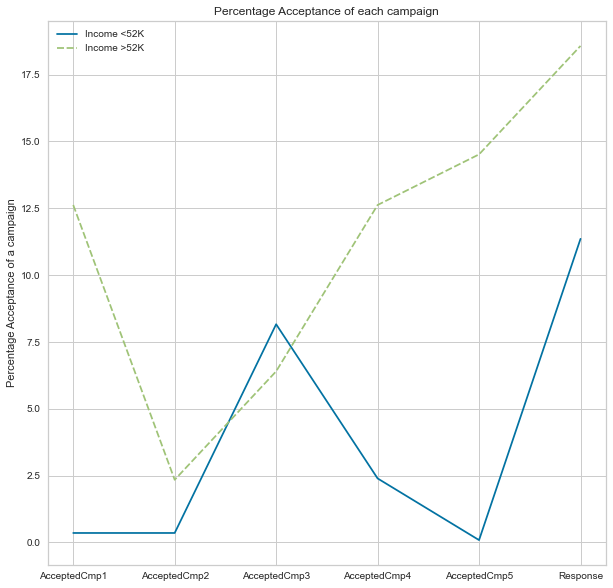

In [21]:
# making dataframes of customers having income <52k and >52K
df1=dataset[dataset.Income<52000]
df2=dataset[dataset.Income>52000]

Camp_cols=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

#Calculating success rate of each campaing for both segments 
success_campaign1=pd.DataFrame((df1[Camp_cols].sum()/df1.shape[0])*100, columns=['Income <52K'])

success_campaign2=pd.DataFrame((df2[Camp_cols].sum()/df2.shape[0])*100, columns=['Income >52K'])

new_df=pd.concat([success_campaign1, success_campaign2], axis=1)

# plot
plt.figure(figsize=(10,10))
sns.lineplot(data=new_df)
plt.title("Percentage Acceptance of each campaign")
plt.ylabel("Percentage Acceptance of a campaign")
plt.show()

In [22]:
new_df

Income <52K  Income >52K
AcceptedCmp1         0.35        12.62
AcceptedCmp2         0.35         2.34
AcceptedCmp3         8.16         6.40
AcceptedCmp4         2.40        12.62
AcceptedCmp5         0.09        14.52
Response            11.36        18.58

### 2. Last campaign

In [23]:
# Calculate the total number of campaigns accepted
dataset['Total_accepted'] = dataset['AcceptedCmp1']+dataset['AcceptedCmp2']+dataset['AcceptedCmp3']+dataset['AcceptedCmp4']+dataset['AcceptedCmp5']+dataset['Response']

In [24]:
dataset['Total_accepted'].describe()

count   2236.00
mean       0.45
std        0.89
min        0.00
25%        0.00
50%        0.00
75%        1.00
max        5.00
Name: Total_accepted, dtype: float64

> The maximum number of campaigns accepted is 5

In [25]:
# Number of clients accepted 5 campaigns
dataset[dataset['Total_accepted']==5].shape[0]

10

In [26]:
# Summary table of the 10 clients
#col=['Response', 'first5cmp', 'Income','Age', 'Recency','Frequency','Monetary','Seniority']
#dataset[dataset['Total_accepted']==5].loc[:,col].describe()

> There are only 10 customers who accepted 5 campaigns and all of them accepted the last campaign (Response)

In [27]:
# Count campaigns accepted within the first 5 campagins (except the last campaign- Response)
dataset['first5cmp'] = dataset['AcceptedCmp1']+dataset['AcceptedCmp2']+dataset['AcceptedCmp3']+dataset['AcceptedCmp4']+dataset['AcceptedCmp5']

# Create new binary column to check if the client accepted at least 1 campaign within the first 5
dataset["first5_accepted"] = np.where(dataset["first5cmp"] == 0, 0,1)

# Summary table
grouped=dataset.groupby('Response')['first5_accepted'].mean()*100
grouped = pd.DataFrame({'Response':grouped.index, 'Accepted_Rate':grouped.values})
grouped["Response"] = np.where(grouped["Response"] == 0, "Refused", "Accepted")
grouped

Response  Accepted_Rate
0   Refused          14.41
1  Accepted          56.29

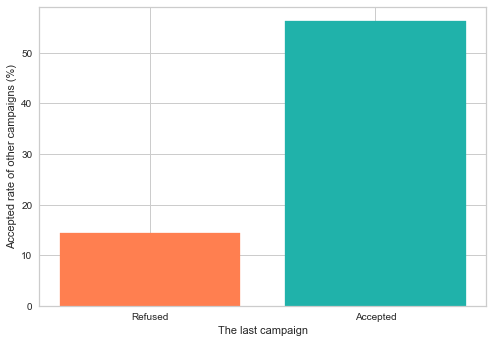

In [28]:
# Represent the relation between the last campaign and the first 5 campaigns
bars = plt.bar(grouped['Response'],grouped['Accepted_Rate'])
plt.xlabel("The last campaign")
plt.ylabel("Accepted rate of other campaigns (%)")
bars[0].set_color('coral')
bars[1].set_color('lightseagreen')
plt.show()

### 3. Campaign vs Products

In [29]:
def amount_per_campaign(columns_name):
    p1=pd.DataFrame(dataset.groupby(['AcceptedCmp1']).mean()[columns_name]).T
    p2=pd.DataFrame(dataset.groupby(['AcceptedCmp2']).mean()[columns_name]).T
    p3=pd.DataFrame(dataset.groupby(['AcceptedCmp3']).mean()[columns_name]).T
    p4=pd.DataFrame(dataset.groupby(['AcceptedCmp4']).mean()[columns_name]).T
    p5=pd.DataFrame(dataset.groupby(['AcceptedCmp5']).mean()[columns_name]).T
    p6=pd.DataFrame(dataset.groupby(['Response']).mean()[columns_name]).T
    pd.concat([p1,p2,p3,p4,p5,p6],axis=0).set_index([Camp_cols]).plot(kind='line', figsize=(8,8))
    plt.ylabel('Average amount spent on' + ' ' + columns_name)
    plt.show()

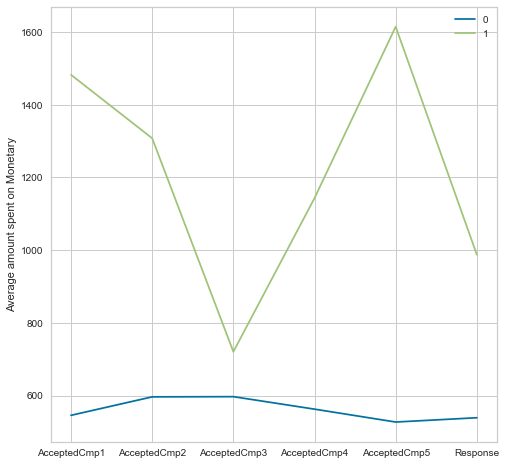

In [30]:
# Average amount spent on all categories
amount_per_campaign('Monetary')

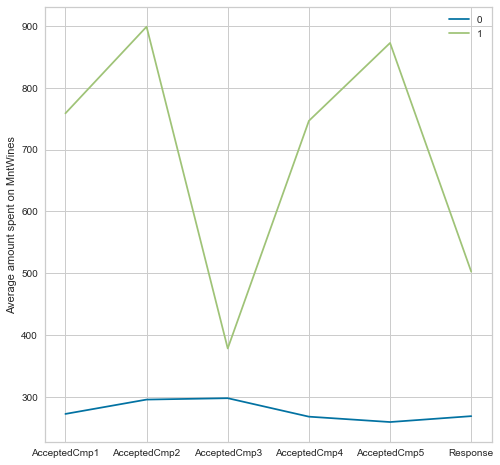

In [31]:
# Average amount spent on Wine
amount_per_campaign('MntWines')

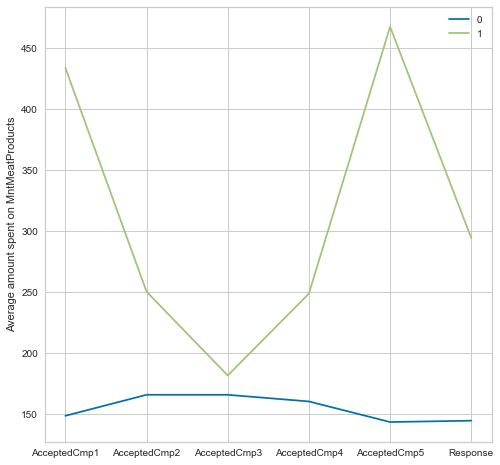

In [32]:
# Average amount spent on Meat
amount_per_campaign('MntMeatProducts')

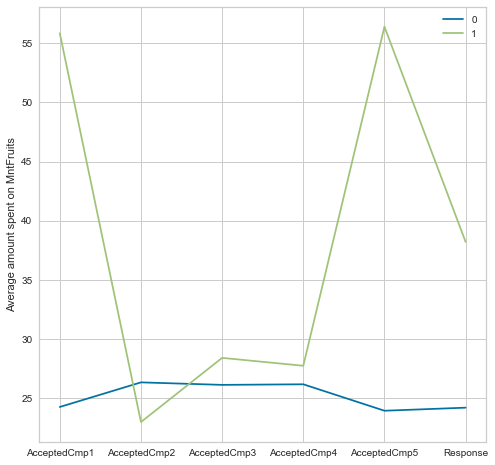

In [33]:
# Average amount spent on Fruits
amount_per_campaign('MntFruits')

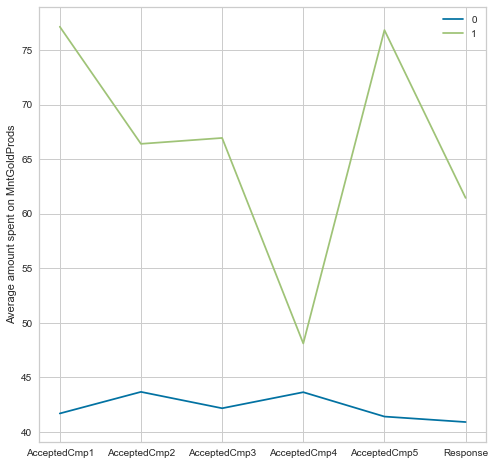

In [34]:
# Average amount spent on Gold
amount_per_campaign('MntGoldProds')

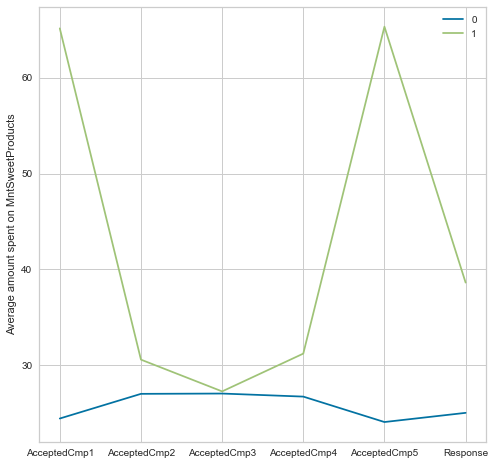

In [35]:
# Average amount spent on Sweet
amount_per_campaign('MntSweetProducts')

In [36]:
cols = ['MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
cmp = ['Cmp1','Cmp2','Cmp3','Cmp4','Cmp5','Response']
df = pd.DataFrame(index=cmp)
for i in cols: 
    data_dict = {}
    data_dict['Cmp1'] = dataset[dataset['AcceptedCmp1']==1].mean()[i]
    data_dict['Cmp2'] = dataset[dataset['AcceptedCmp2']==1].mean()[i]
    data_dict['Cmp3']= dataset[dataset['AcceptedCmp3']==1].mean()[i]
    data_dict['Cmp4'] = dataset[dataset['AcceptedCmp4']==1].mean()[i]
    data_dict['Cmp5'] = dataset[dataset['AcceptedCmp5']==1].mean()[i]
    data_dict['Response']= dataset[dataset['Response']==1].mean()[i]
    df_i = pd.DataFrame.from_dict(data_dict,orient='index', columns=[i])
    df = pd.concat([df,df_i],axis=1)

Text(0, 0.5, 'Average spending per category')

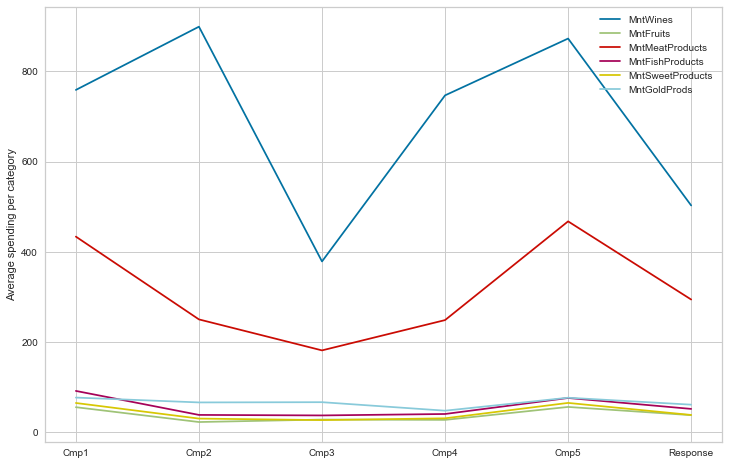

In [37]:
fig, ax = plt.subplots(figsize=(8, 8))
df.plot(kind='line', ax=ax)
fig.subplots_adjust(right=1.3)
plt.ylabel("Average spending per category")

> In general, clients who have positively responded to the campaigns tend to spend more than those who don't.
> Campaign 1 and 5 have been more sucessful than others, campaign 3 might be related to Gold Product.

### 4. Product preference

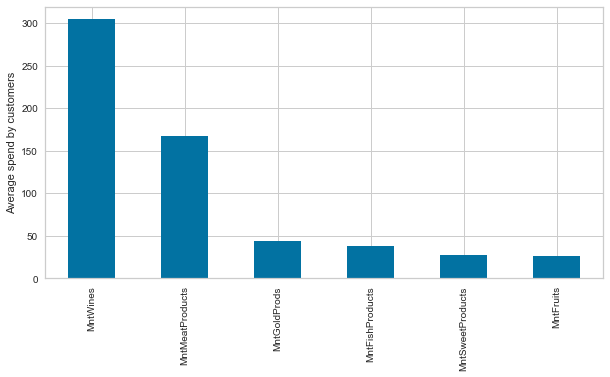

In [38]:
mnt_cols = [col for col in dataset.columns if 'Mnt' in col]

spending=dataset[mnt_cols].mean(axis=0).sort_values(ascending=False)
spending.plot(kind='bar', figsize=(10,5))
plt.ylabel("Average spend by customers")
plt.show()

In [39]:
def amount_per_category(df, column_name):
    df_new1=((df.groupby([column_name]).sum()[mnt_cols].T)/df.groupby([column_name]).sum()['Monetary'])
    plt.figure(figsize=(10,8))
    sns.heatmap(df_new1.T, annot=True, cmap="YlGnBu")
    plt.show()

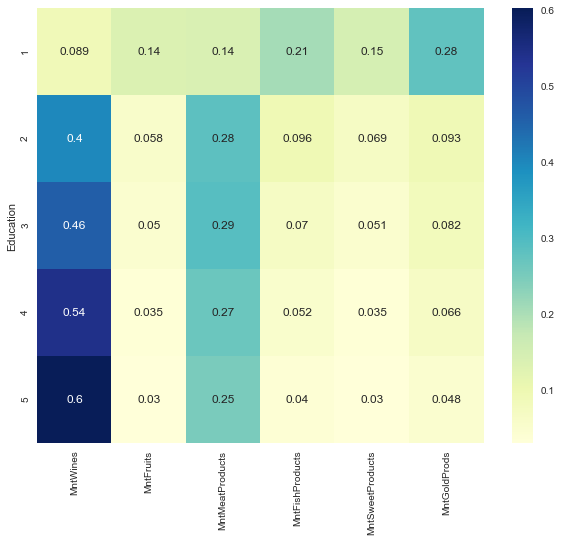

In [40]:
# Correlation matrix between Education levels and product categories
amount_per_category(dataset, 'Education')

Observations:

<li>Customers with PhD spend ~60% of their total spending on wines.
<li>Customers with Graduation and Master's spend ~45-50% of their total spending on wines.
<li>Customers with Graduation and Master's spend ~27-29% of their total spending on meat.
<li>Customers with PhD spend ~25% of their total spending on meat.
<li>Customers having education level Master or PhD spend ~80% on meat and wines.
<li>Customers with basic education spend more on Fruits, Fish, Sweet, and Gold products.

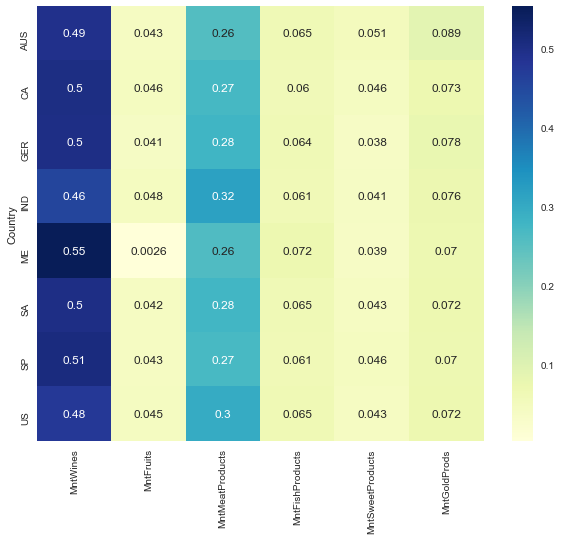

In [41]:
amount_per_category(dataset, 'Country')

<li> Customers from any listed countries spend between 46-55% of their spending on wines, which is the highest percentage compared to customers' spending on other products.

<li>Customers from the US spend 48% of their spending on wines, and 3% of their spending on meat.

<li>Customers from the AUS spend 75% their spending on wines, and meat.

<li>Customers from the SP spend spend ~ 80% of their spending on wines, and meat.

<li>Customers from the IND spend spend ~ 5% of their spending on fruits.

<li>Customers from the AUS spend spend ~ 9% of their spending on gold where as customers from teh IND spend ~8% of their spending on gold.

<AxesSubplot:>

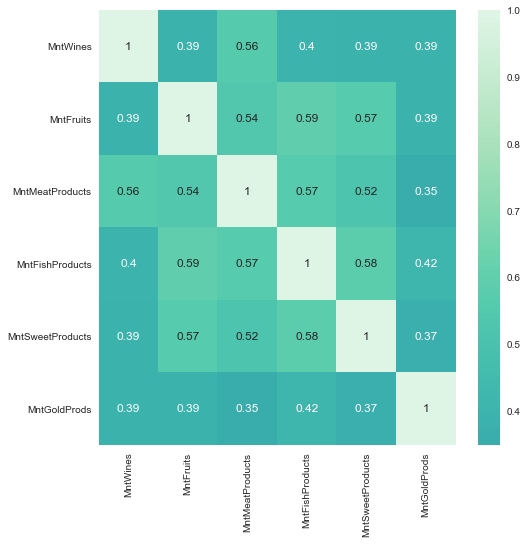

In [42]:
# Correlation within product categories
corrmat = dataset[['MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].corr()

plt.figure(figsize=(8,8))  
sns.heatmap(corrmat, annot = True, cmap = 'mako', center = 0)

<li> We can see that spending on the meat category is correlated with most of the other product categories, except for gold products. Due to the culinary practice present in various cultures, a remarkable correlation is observed between the expenditure on meat and wine.
<li> High correlation is found between the monetary amount spent on fish and fruit, which can be associated with the current trend in health care.

### 5. Channels

In [43]:
# list of cols for channels
channel_cols = [col for col in dataset.columns if 'Purchases' in col] 

In [44]:
dataset['income_cat']=pd.qcut(dataset.Income, q=[0, 0.25, 0.50, 0.75, 1], labels=['low', 'medium', 'high', 'very_high'])

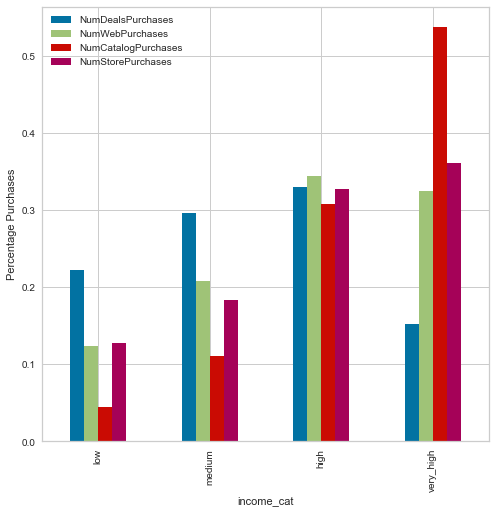

In [45]:
group=dataset.groupby('income_cat').sum()[channel_cols]
(group/group.sum()).plot(kind='bar', figsize=(8,8))
plt.ylabel("Percentage Purchases")
plt.show()

<li>From the above grouped vertical bar chart, we can conclude that those very high-income customers made more than 50% of their purchases using catalog (buying goods to be shipped through the mail), which rank highest and followed by the purchases made directly in stores (2nd). High-income customers also rank high among all income groups in terms of purchases made through the catalog and directly in stores.

<li>Low-income customers rank high in the number of purchases made with discounts, whereas low-income customers make the lowest purchases through the catalog.

<li>High-income customers rank almost similar in terms of the numbers of purchases made via all 4 different channels, which are at or above 30%

<li>Medium income customers made the highest numbers of the purchase via discount i.e., NumDealsPurchases (number of purchases made with discount)

<li>High and very high income customers made more than 65% of the 'in stores" purchases.

<li>High and very high income customers made more than 60% of the purchases via company's website

> We can also visualize the correlation by purchases from different channels and income of the customer.

<AxesSubplot:>

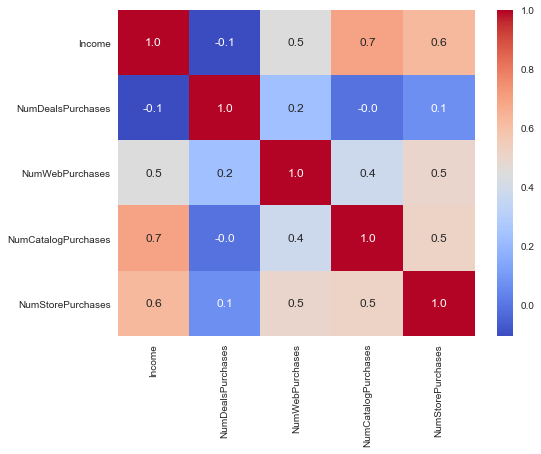

In [46]:
corr=dataset[['Income', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases' ]].corr()

#Write your code here
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True,cmap='coolwarm',
        fmt=".1f",
        xticklabels=corr.columns,
        yticklabels=corr.columns)

> Observations:

<li>As we know that correlation does not imply causation.

<li>NumStorePurchase & NumCatalog purchases show a high positive correlation with customer income (0.7). The customers with high income are most likely to make the highest number of purchases via 'in stores' and 'catalog.'

<li>NumWebPurchases has a positive correlation of 0.5 with the variable income.

<li>NumDealPurchases has a negative correlation (-0.1) with the variable income.

<li>NumCatalogPurchase has a positive correlation of 0.4 with the NumWebPurchase.

[Return Table of Contents](#Table)

<a id="section_2"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#59C1BD;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align:center;
          color:white;">
          CUSTOMER SEGMENTATION
</p>
</div>

## <span style="color:darkcyan"> A. RFM MODEL </span><a class="anchor" id="section_2_1"></a>

In [47]:
RFM = dataset[['Recency', 'Frequency', 'Monetary']]
RFM.describe()

Recency  Frequency  Monetary
count  2236.00    2236.00   2236.00
mean     49.12       1.11    605.99
std      28.96       0.57    601.87
min       0.00       0.00      5.00
25%      24.00       0.71     69.00
50%      49.00       1.00    396.50
75%      74.00       1.33   1045.50
max      99.00       4.00   2525.00

In [48]:
RFM.head()

Recency  Frequency  Monetary
ID                                 
1826         0       2.14      1190
1            0       3.14       577
10476        0       1.50       251
1386         0       1.25        11
5371         0       1.44        91

### RFM 5x5x5

In [49]:
RFM_clusters = RFM.copy()
RFM_clusters["freq_score"] = pd.qcut(RFM_clusters["Frequency"], 5, labels=[1,2,3,4,5])
RFM_clusters["freq_score"] = pd.to_numeric(RFM_clusters["freq_score"])

RFM_clusters["recency_score"] = pd.qcut(RFM_clusters["Recency"], 5, labels=[5,4,3,2,1])
RFM_clusters ["recency_score"] = pd.to_numeric(RFM_clusters["recency_score"])

RFM_clusters["monetary_score"] = pd.qcut(RFM_clusters["Monetary"], 5, labels=[1,2,3,4,5])
RFM_clusters["monetary_score"] = pd.to_numeric(RFM_clusters["monetary_score"])
RFM_clusters .head()

Recency  Frequency  Monetary  freq_score  recency_score  monetary_score
ID                                                                            
1826         0       2.14      1190           5              5               5
1            0       3.14       577           5              5               3
10476        0       1.50       251           5              5               3
1386         0       1.25        11           4              5               1
5371         0       1.44        91           5              5               2

## <span style="color:darkcyan"> B. Customer segmentation with K-means clustering method </span><a class="anchor" id="section_2_2"></a>

Elbow Method to determine the number of clusters to be formed:


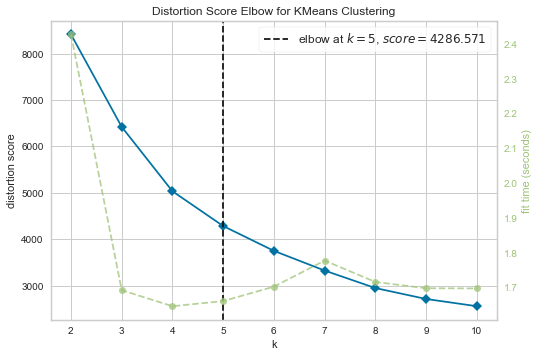

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [50]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(RFM_clusters[['freq_score','recency_score','monetary_score']])
Elbow_M.show()

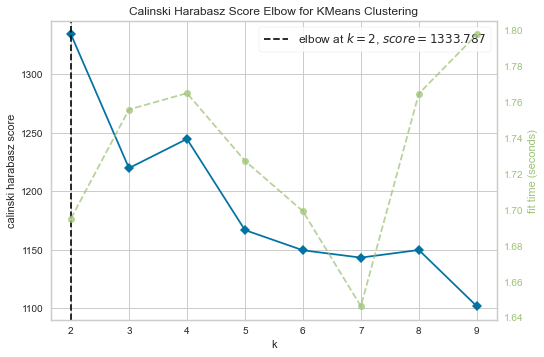

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [51]:
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10),metric='calinski_harabasz', timings= True)
visualizer.fit(RFM_clusters[['freq_score','recency_score','monetary_score']])        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

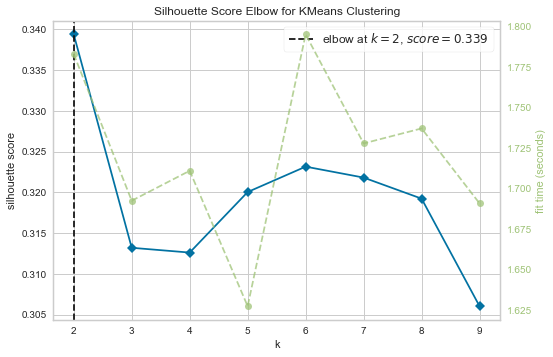

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [52]:
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= True)
visualizer.fit(RFM_clusters[['freq_score','recency_score','monetary_score']])        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

For n_clusters = 2 The average silhouette_score is : 0.33937644880773027
For n_clusters = 3 The average silhouette_score is : 0.3174195055804439
For n_clusters = 4 The average silhouette_score is : 0.31538916636357517
For n_clusters = 5 The average silhouette_score is : 0.3200337843845028
For n_clusters = 6 The average silhouette_score is : 0.31782712509995653
For n_clusters = 7 The average silhouette_score is : 0.32937710485592986
For n_clusters = 8 The average silhouette_score is : 0.3168962733813435
For n_clusters = 9 The average silhouette_score is : 0.3250654767180554


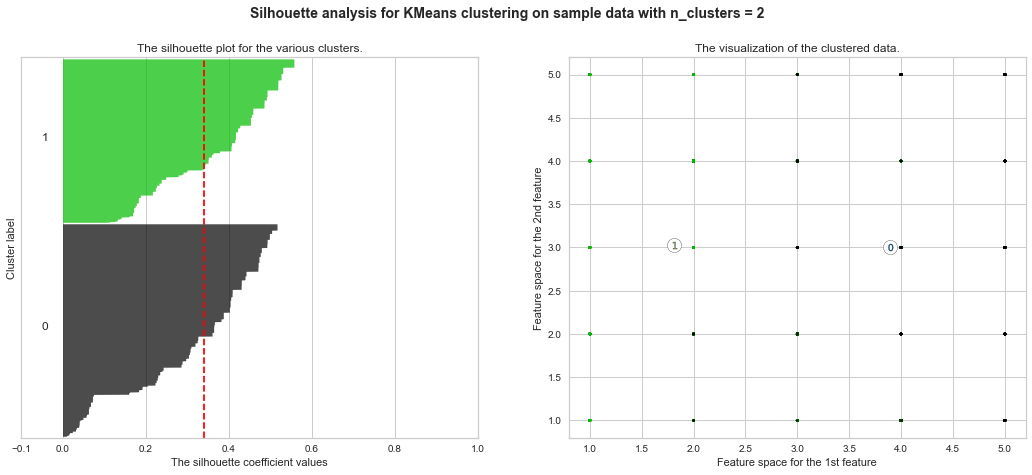

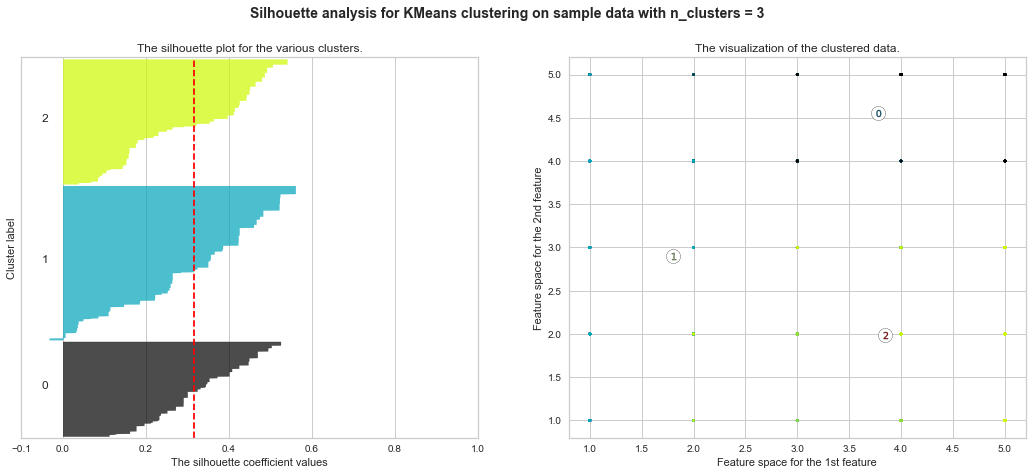

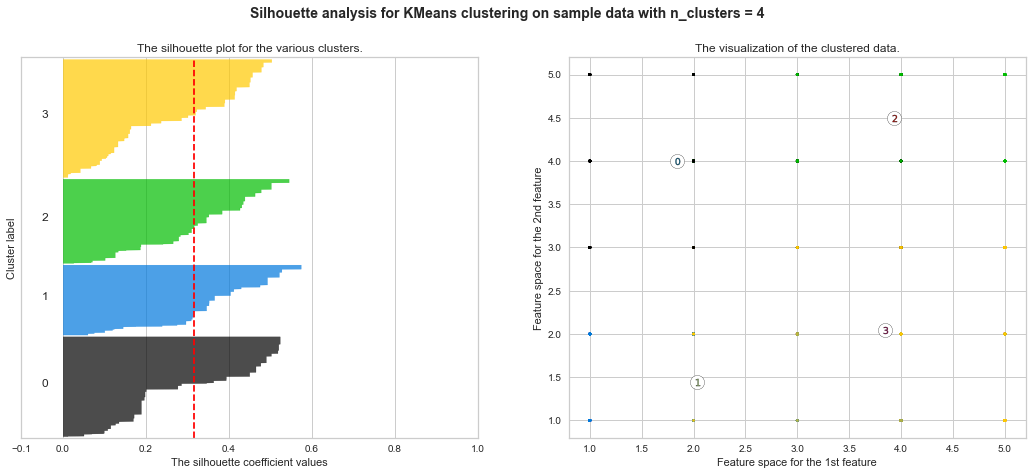

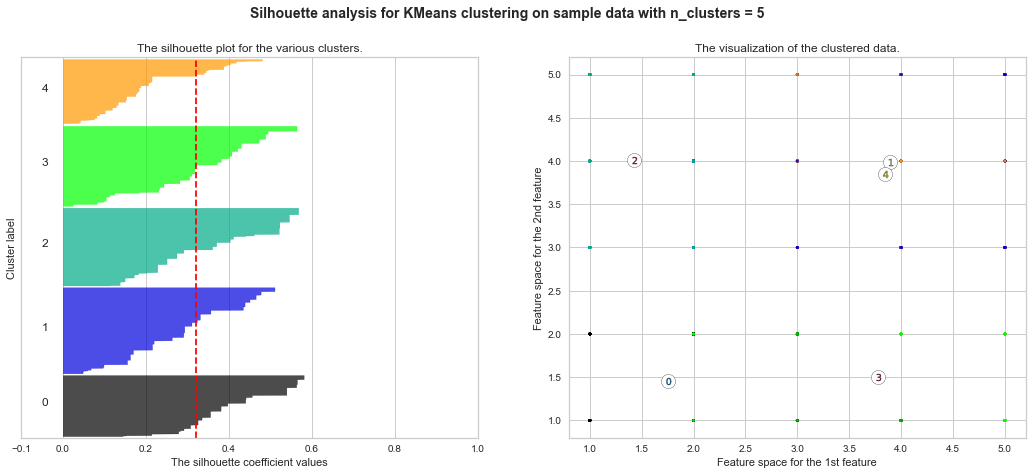

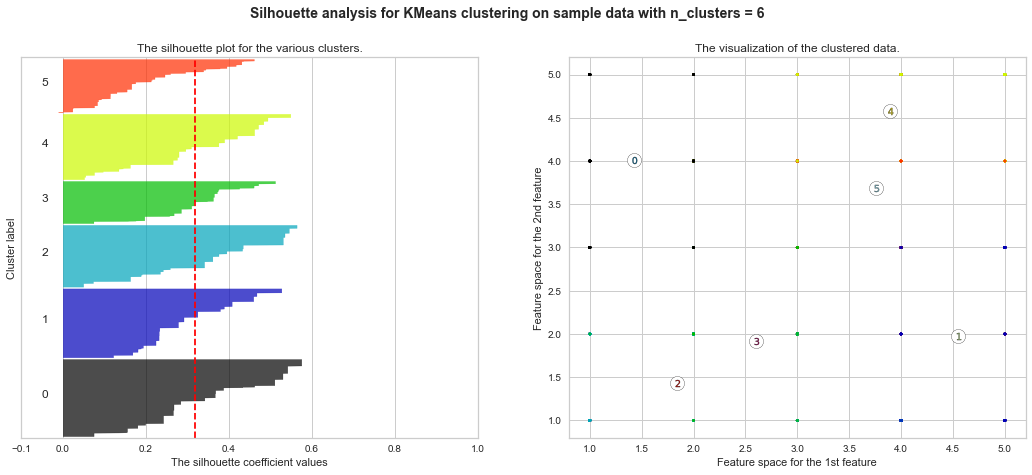

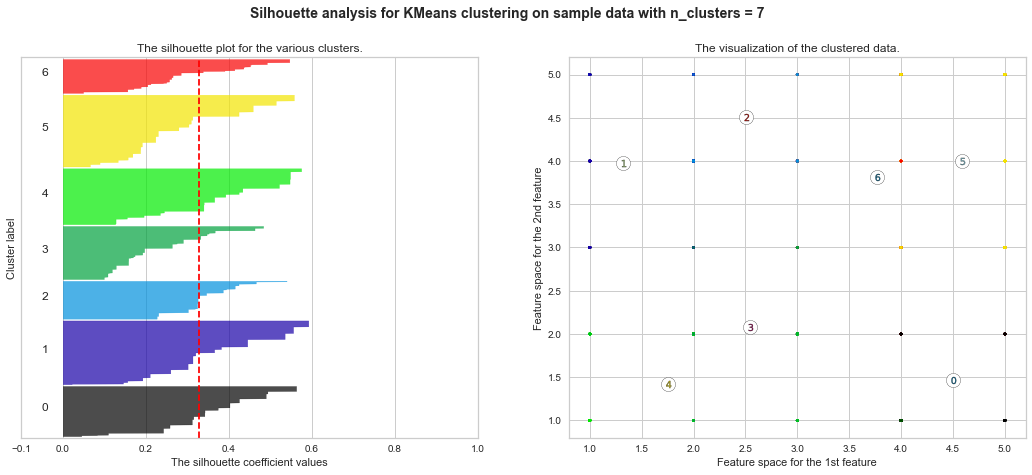

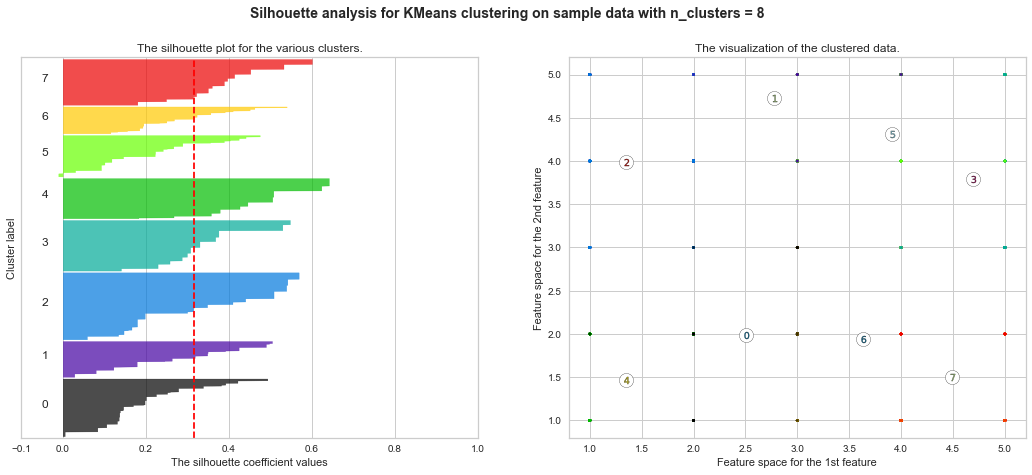

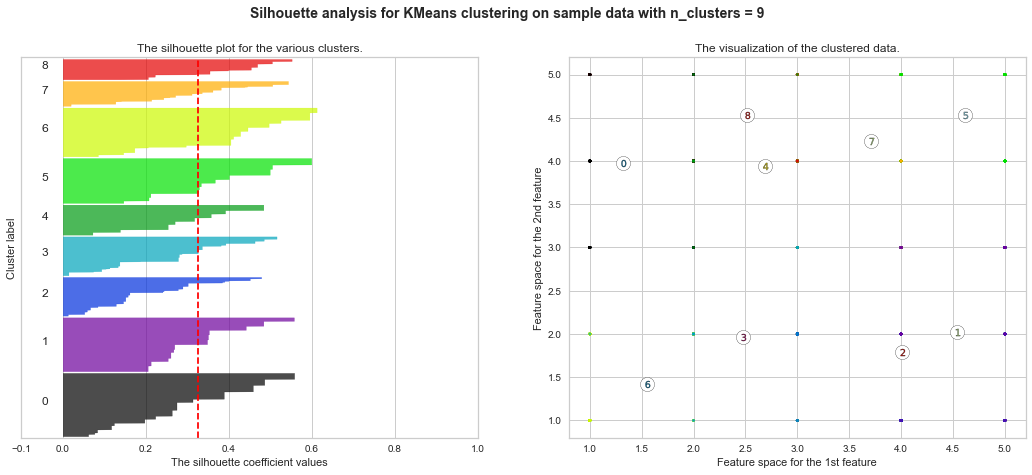

In [53]:
from sklearn.metrics import silhouette_samples , silhouette_score
import matplotlib.cm as cm
range_n_clusters = [i for i in range(2,10)]
X = RFM_clusters[['freq_score','recency_score','monetary_score']]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X.iloc[:, 0], X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

 -  After the analysis and observation of the results of the three criteria, it is found that the **Calinski Harabasz** and **Silhouette scores** provide the option of dividing the group of individuals into two different classes. However, with some business knowledge and for the development of the work, it is considered, on the one hand, better to pay attention to what is indicated by the **Elbow method** and differentiate the dataset into four groups. <br>
 - In addition, we have also tried segmenting the dataset into five different clusters in order to check whether the users were better described. This is done according to the score obtained by the Silhouette method, which has a higher score for the division between 5 students than that between 4. With a larger number of segmentations, there is a risk of overfitting the data.

## <span style="color:darkcyan"> B.1) Segmentation with 4 clusters </span> <a class="anchor" id="section_2_2_1"></a>

In [54]:
# Set the seed
seed_value = 123
np.random.seed(seed_value)

In [55]:
# Use K-means clustering algorithmn
kmeans= KMeans(n_clusters=4,random_state=seed_value)
kmeans.fit(RFM_clusters)

KMeans(n_clusters=4, random_state=123)

In [56]:
# Save the cluster's labels
RFM_clusters['Cluster']= kmeans.labels_
RFM_clusters.head()

Recency  Frequency  Monetary  freq_score  recency_score  \
ID                                                               
1826         0       2.14      1190           5              5   
1            0       3.14       577           5              5   
10476        0       1.50       251           5              5   
1386         0       1.25        11           4              5   
5371         0       1.44        91           5              5   

       monetary_score  Cluster  
ID                              
1826                5        2  
1                   3        0  
10476               3        3  
1386                1        3  
5371                2        3

In [57]:
# Create the result dataframe
Out1 = dataset.copy()
Out1['Cluster'] = RFM_clusters['Cluster']
Out1.head()

Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  \
ID                                                                        
1826           3          Alone 84835.00        0         0  2014-06-16   
1              3          Alone 57091.00        0         0  2014-06-15   
10476          3      In couple 67267.00        0         1  2014-05-13   
1386           3      In couple 32474.00        1         1  2014-05-11   
5371           3          Alone 21474.00        1         0  2014-04-08   

       Recency  MntWines  MntFruits  MntMeatProducts  ...  Has_child  \
ID                                                    ...              
1826         0       189        104              379  ...          0   
1            0       464          5               64  ...          0   
10476        0       134         11               59  ...          1   
1386         0        10          0                1  ...          1   
5371         0         6         16               24  ...          1   

       Education_levels  Seniority  Frequency  Monetary  Total_accepted  \
ID                                                                        
1826       Postgraduate          7       2.14      1190               1   
1          Postgraduate          7       3.14       577               2   
10476      Postgraduate          8       1.50       251               0   
1386       Postgraduate          8       1.25        11               0   
5371       Postgraduate          9       1.44        91               2   

       first5cmp  first5_accepted  income_cat  Cluster  
ID                                                      
1826           0                0   very_high        2  
1              1                1        high        0  
10476          0                0        high        3  
1386           0                0         low        3  
5371           1                1         low        3  

[5 rows x 38 columns]

### Plotting the results

In [58]:
import plotly.graph_objs as go
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Recency -->'),yaxis = dict(title  = 'Frequency --->'),zaxis = dict(title  = 'Monetary -->'))
# model.labels_ is nothing but the predicted clusters i.e y_clusters
#x = RFM_clusters[['freq_score','recency_score','monetary_score']]
x = RFM_clusters[['Recency','Frequency','Monetary']]
labels = kmeans.labels_
trace = go.Scatter3d(x=x.iloc[:, 0], y=x.iloc[:, 1], z=x.iloc[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [59]:
PLOT = go.Figure()
for C in list(Out1.Cluster.unique()):

    PLOT.add_trace(go.Scatter3d(x = Out1[Out1.Cluster == C]['Income'],
                                y = Out1[Out1.Cluster == C]['Age'],
                                z = Out1[Out1.Cluster == C]['Monetary'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(C)))
PLOT.update_traces(hovertemplate='Income: %{x} <br>Seniority: %{y} <br>Spending: %{z}')

    
PLOT.update_layout(width = 850, height = 850, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Income', titlefont_color = 'black'),
                                yaxis=dict(title = 'Age', titlefont_color = 'black'),
                                zaxis=dict(title = 'Monetary', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

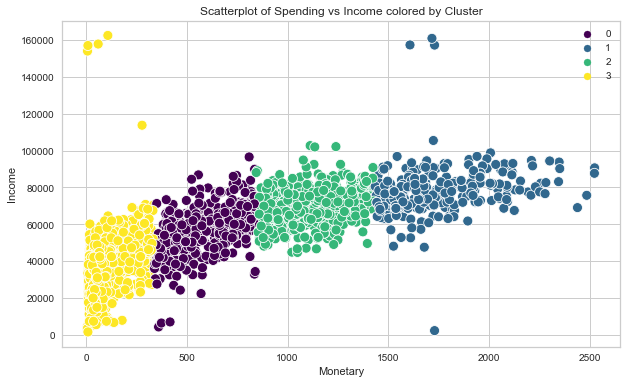

In [60]:
plt.figure(figsize=(10, 6))

# Use seaborn for improved styling (optional)
sns.scatterplot(x='Monetary', y='Income', hue='Cluster', data=Out1, palette='viridis', s=100)

# Set plot labels and title
plt.xlabel('Monetary')
plt.ylabel('Income')
plt.title('Scatterplot of Spending vs Income colored by Cluster')

# Display the legend
plt.legend()

# Show the plot
plt.show()

### Cluster summary

In [61]:
# Check number of clients in each cluster
Out1['Cluster'].value_counts()

3    1070
2     453
0     429
1     284
Name: Cluster, dtype: int64

#### GROUP 0: Potential loyalists (429 clients)
> The first group consists of 429 clients characterized by an average income and significantly low spending but very recent last purchase. On the other hand, people in this group tend to have teenage children, and buy at discounted prices. In addition, they are very frequent visitors to the website, but they shop more in-store. They have been referred to as <b>"Potential Costumers"</b>.

#### GROUP 1: Champions (284 clients)
> Cluster 1 represent the group of 284 clients which have been purchasing the company's products for a long time with highest spending across all categories and high income level, which is why we will name this group as <b>"Champions"</b>. On the other hand, it is the group that actively accepts most of the campaigns and doesn't tend to have children. 

#### GROUP 2: Loyal customers (453 clients)
> The 453 clients of cluster 2 are referred to as <b>"Loyal Customers"</b>, whose average expenditure and income are remarkably high and ttend to have young children. In terms of purchasing behavior, this group that tends to make frequent in-store purchases.

#### GROUP 3: Core customers (1070 clients)
> This group consists of 1070 clients and has the lowest level of spending and income. In addition, it is the youngest group of clients with kids, which doesn't tend to accept marketing campaigns. Moreover, this group of consumers makes most of their purchases in-store and, due to the fact that they have the lowest "Seniority" value and take up to 50% of the total number of clients, we will define this group as <b>"Core customers"</b>. 

In [62]:
# Create a column of cluster name to present the cluster's statistics
Out1['Cluster_name']=Out1['Cluster'].replace({0:'Potential loyalists',1:'Champions',2:'Loyal customers', 3:'Core customers'})

In [63]:
Out1.groupby('Cluster_name').describe(include=object)

Marital_Status                        Country             \
                             count unique        top freq   count unique top   
Cluster_name                                                                   
Champions                      284      2  In couple  178     284      7  SP   
Core customers                1070      2  In couple  696    1070      7  SP   
Loyal customers                453      2  In couple  288     453      8  SP   
Potential loyalists            429      2  In couple  280     429      7  SP   

                         Education_levels                            
                    freq            count unique           top freq  
Cluster_name                                                         
Champions            142              284      2  Postgraduate  272  
Core customers       534             1070      2  Postgraduate  907  
Loyal customers      217              453      2  Postgraduate  412  
Potential loyalists  201              429      2  Postgraduate  390

In [64]:
Out1['Total_accepted'] = Out1['AcceptedCmp1']+Out1['AcceptedCmp2']+Out1['AcceptedCmp3']+Out1['AcceptedCmp4']+Out1['AcceptedCmp5']

In [65]:
cluster_centroid = Out1.groupby('Cluster_name').mean()
cluster_centroid

Education   Income  Kidhome  Teenhome  Recency  MntWines  \
Cluster_name                                                                    
Champions                 3.65 78646.97     0.06      0.20    51.42    866.58   
Core customers            3.34 35819.74     0.77      0.49    49.10     45.34   
Loyal customers           3.53 69422.62     0.07      0.51    49.52    556.73   
Potential loyalists       3.55 56153.20     0.29      0.75    47.20    310.50   

                     MntFruits  MntMeatProducts  MntFishProducts  \
Cluster_name                                                       
Champions                68.23           573.71            96.90   
Core customers            4.96            23.38             7.09   
Loyal customers          52.07           297.36            74.81   
Potential loyalists      24.44           118.24            34.81   

                     MntSweetProducts  ...   Age  Children  Has_child  \
Cluster_name                           ...                              
Champions                       69.44  ... 45.97      0.26       0.24   
Core customers                   5.34  ... 44.15      1.25       0.88   
Loyal customers                 54.13  ... 49.11      0.58       0.51   
Potential loyalists             24.69  ... 47.89      1.04       0.83   

                     Seniority  Frequency  Monetary  Total_accepted  \
Cluster_name                                                          
Champions                19.91       1.34   1753.24            1.06   
Core customers           17.18       0.83    100.58            0.08   
Loyal customers          19.11       1.40   1111.96            0.39   
Potential loyalists      18.66       1.34    572.79            0.23   

                     first5cmp  first5_accepted  Cluster  
Cluster_name                                              
Champions                 1.06             0.60     1.00  
Core customers            0.08             0.08     3.00  
Loyal customers           0.39             0.28     2.00  
Potential loyalists       0.23             0.18     0.00  

[4 rows x 33 columns]

In [66]:
cols=['Education', 'Income','Recency','Frequency', 'Monetary','Seniority','Age', 'Children','Kidhome', 'Teenhome', 'Has_child']
cluster_centroid = Out1.groupby('Cluster_name').mean()
cluster_centroid[cols]

Education   Income  Recency  Frequency  Monetary  \
Cluster_name                                                            
Champions                 3.65 78646.97    51.42       1.34   1753.24   
Core customers            3.34 35819.74    49.10       0.83    100.58   
Loyal customers           3.53 69422.62    49.52       1.40   1111.96   
Potential loyalists       3.55 56153.20    47.20       1.34    572.79   

                     Seniority   Age  Children  Kidhome  Teenhome  Has_child  
Cluster_name                                                                  
Champions                19.91 45.97      0.26     0.06      0.20       0.24  
Core customers           17.18 44.15      1.25     0.77      0.49       0.88  
Loyal customers          19.11 49.11      0.58     0.07      0.51       0.51  
Potential loyalists      18.66 47.89      1.04     0.29      0.75       0.83

In [67]:
cmp_cluster = cluster_centroid[['AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5', 'Response']]
cmp_cluster

AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
Cluster_name                                                                  
Champions                    0.29          0.05          0.13          0.20   
Core customers               0.00          0.00          0.07          0.01   
Loyal customers              0.11          0.02          0.06          0.11   
Potential loyalists          0.03          0.01          0.06          0.10   

                     AcceptedCmp5  Response  
Cluster_name                                 
Champions                    0.40      0.39  
Core customers               0.00      0.09  
Loyal customers              0.09      0.16  
Potential loyalists          0.02      0.12

In [68]:
product_cluster1 = cluster_centroid[['MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']]
product_cluster1

MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Cluster_name                                                                 
Champions              866.58      68.23           573.71            96.90   
Core customers          45.34       4.96            23.38             7.09   
Loyal customers        556.73      52.07           297.36            74.81   
Potential loyalists    310.50      24.44           118.24            34.81   

                     MntSweetProducts  MntGoldProds  
Cluster_name                                         
Champions                       69.44         78.37  
Core customers                   5.34         14.47  
Loyal customers                 54.13         76.85  
Potential loyalists             24.69         60.12

In [69]:
channel_cluster1 = cluster_centroid[['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
channel_cluster1

NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
Cluster_name                                                                   
Champions                         1.54             5.44                 6.42   
Core customers                    2.11             2.17                 0.56   
Loyal customers                   2.26             5.76                 5.17   
Potential loyalists               3.45             6.20                 2.77   

                     NumStorePurchases  NumWebVisitsMonth  
Cluster_name                                               
Champions                         8.14               3.35  
Core customers                    3.28               6.39  
Loyal customers                   8.87               3.92  
Potential loyalists               7.27               5.42

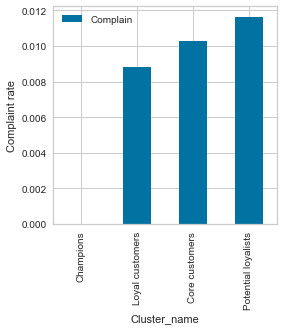

In [70]:
# Complain rate of each cluster
cluster_centroid[['Complain']].sort_values('Complain').plot(kind='bar', figsize=(4,4))
plt.ylabel("Complaint rate")
plt.show()

> The "Champions" is the only group of customers that doesn't make complaints. 

### RADAR PLOT

In [71]:
df = Out1[['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','Cluster','Cluster_name']]

attributes = df.columns[:6]
colors=['purple','yellow','red','blue']
cluster={0:'Potential loyalists',1:'Champions',2:'Loyal customers', 3:'Core customers'}

fig = go.Figure()
for index in range(0,4):
    fig.add_trace(go.Scatterpolar(r=np.mean(df.loc[df["Cluster"] == index, attributes]),
                                  theta=attributes,
                                  fill='toself',
                                  fillcolor=colors[index],
                                  opacity=0.4,
                                  name=cluster[index]))
    
fig.update_layout(polar=dict(radialaxis=dict(visible=True)),showlegend=True,
                  title="Radar plot - Cluster attributes (Normalized Values)")
fig.show()

> **"Champions"** group has the highest spending in every product categories, followed by **"Loyal customers"**

In [72]:
df = Out1[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response','Cluster','Cluster_name']]

attributes = df.columns[:6]
colors=['purple','yellow','red','blue']
cluster={0:'Potential loyalists',1:'Champions',2:'Loyal customers', 3:'Core customers'}

fig = go.Figure()
for index in range(0,4):
    fig.add_trace(go.Scatterpolar(r=np.mean(df.loc[df["Cluster"] == index, attributes]),
                                  theta=attributes,
                                  fill='toself',
                                  fillcolor=colors[index],
                                  opacity=0.4,
                                  name=cluster[index]))
    
fig.update_layout(polar=dict(radialaxis=dict(visible=True)),showlegend=True,
                  title="Radar plot - Cluster attributes (Normalized Values)")
fig.show()

> The most actively responsive group of customers to Marketing campaigns is the **"Champions"**, followed by **"Loyal customers"**. 

In [73]:
df = Out1[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth','Cluster','Cluster_name']]

attributes = df.columns[:5]
colors=['purple','yellow','red','blue']
cluster={0:'Potential loyalists',1:'Champions',2:'Loyal customers', 3:'Core customers'}

fig = go.Figure()
for index in range(0,4):
    fig.add_trace(go.Scatterpolar(r=np.mean(df.loc[df["Cluster"] == index, attributes]),
                                  theta=attributes,
                                  fill='toself',
                                  fillcolor=colors[index],
                                  opacity=0.4,
                                  name=cluster[index]))
    
fig.update_layout(polar=dict(radialaxis=dict(visible=True)),showlegend=True,
                  title="Radar plot - Cluster attributes (Normalized Values)")
fig.show()

> The mayority of the clients choose in-store purchase methods. On the other hand, catalog channel is most popular among the **"Champions"** customers.<br>
> Although haven't made a lot of purchases, the **"Core customers"** tends to visit the store's website more than any other segments. Meanwhile, the **"Potential loyalists"** are the most responsive to discounts. 

[Return Table of Contents](#Table)

## <span style="color:darkcyan"> B.2) Segmentation with 5 clusters </span> <a class="anchor" id="section_2_2_2"></a>

In [74]:
RFM.head()

Recency  Frequency  Monetary
ID                                 
1826         0       2.14      1190
1            0       3.14       577
10476        0       1.50       251
1386         0       1.25        11
5371         0       1.44        91

In [75]:
RFM_clusters2 = RFM_clusters.drop(["Cluster"], axis=1)
RFM_clusters2.head()

Recency  Frequency  Monetary  freq_score  recency_score  monetary_score
ID                                                                            
1826         0       2.14      1190           5              5               5
1            0       3.14       577           5              5               3
10476        0       1.50       251           5              5               3
1386         0       1.25        11           4              5               1
5371         0       1.44        91           5              5               2

In [76]:
kmeans2= KMeans(n_clusters=5,random_state=seed_value)
kmeans2.fit(RFM_clusters2)

KMeans(n_clusters=5, random_state=123)

In [77]:
RFM_clusters2['Cluster']= kmeans2.labels_
RFM_clusters2.head()

Recency  Frequency  Monetary  freq_score  recency_score  \
ID                                                               
1826         0       2.14      1190           5              5   
1            0       3.14       577           5              5   
10476        0       1.50       251           5              5   
1386         0       1.25        11           4              5   
5371         0       1.44        91           5              5   

       monetary_score  Cluster  
ID                              
1826                5        3  
1                   3        0  
10476               3        2  
1386                1        2  
5371                2        2

In [78]:
import plotly.graph_objs as go
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Recency -->'),yaxis = dict(title  = 'Frequency --->'),zaxis = dict(title  = 'Monetary -->'))
# model.labels_ is nothing but the predicted clusters i.e y_clusters
#x = RFM_clusters[['freq_score','recency_score','monetary_score']]
x = RFM_clusters2[['Recency','Frequency','Monetary']]
labels = kmeans2.labels_
trace = go.Scatter3d(x=x.iloc[:, 0], y=x.iloc[:, 1], z=x.iloc[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [79]:
Out2 = dataset.copy()
Out2['Cluster'] = RFM_clusters2['Cluster']
Out2.head()

Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  \
ID                                                                        
1826           3          Alone 84835.00        0         0  2014-06-16   
1              3          Alone 57091.00        0         0  2014-06-15   
10476          3      In couple 67267.00        0         1  2014-05-13   
1386           3      In couple 32474.00        1         1  2014-05-11   
5371           3          Alone 21474.00        1         0  2014-04-08   

       Recency  MntWines  MntFruits  MntMeatProducts  ...  Has_child  \
ID                                                    ...              
1826         0       189        104              379  ...          0   
1            0       464          5               64  ...          0   
10476        0       134         11               59  ...          1   
1386         0        10          0                1  ...          1   
5371         0         6         16               24  ...          1   

       Education_levels  Seniority  Frequency  Monetary  Total_accepted  \
ID                                                                        
1826       Postgraduate          7       2.14      1190               1   
1          Postgraduate          7       3.14       577               2   
10476      Postgraduate          8       1.50       251               0   
1386       Postgraduate          8       1.25        11               0   
5371       Postgraduate          9       1.44        91               2   

       first5cmp  first5_accepted  income_cat  Cluster  
ID                                                      
1826           0                0   very_high        3  
1              1                1        high        0  
10476          0                0        high        2  
1386           0                0         low        2  
5371           1                1         low        2  

[5 rows x 38 columns]

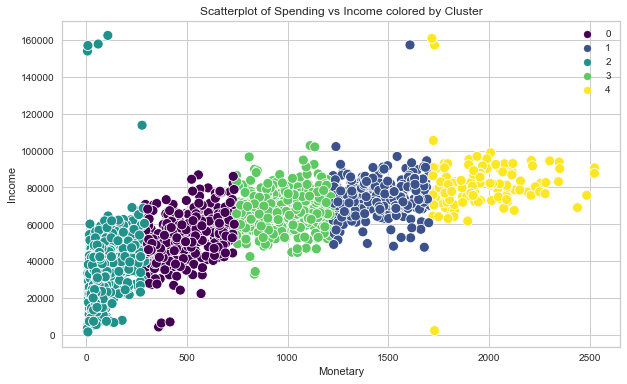

In [80]:
plt.figure(figsize=(10, 6))

# Use seaborn for improved styling (optional)
sns.scatterplot(x='Monetary', y='Income', hue='Cluster', data=Out2, palette='viridis', s=100)

# Set plot labels and title
plt.xlabel('Monetary')
plt.ylabel('Income')
plt.title('Scatterplot of Spending vs Income colored by Cluster')

# Display the legend
plt.legend()

# Show the plot
plt.show()

In [81]:
Out2['Cluster'].value_counts()

2    1016
3     409
0     406
1     271
4     134
Name: Cluster, dtype: int64

#### CLUSTER 0: Need attention (406 clients) 
> Cluster 0, referred to as "Needs attention", consists of 406 people that have a relatively low level of spending and income and their last purchase was the most recent. On the other hand, they have many children, usually teenagers. In addition, it is the group that buys the most at discounted prices.
    
#### CLUSTER 1: Loyal (271 clients)
> As for group number 1 or "Loyal Customers", represented in Figure 23 by the bright blue color, it is known to be made up of 271 former customers with the highest spending in all categories and a considerable level of income. On the other hand, they have teenage children, although they do not stand out for having many kids.
    
#### CLUSTER 3: Potential (409 clients)
> Group 3 is represented by 409 people whose average spending and income do not stand out either positively or negatively. However, they can become good customers, as they are the ones with the highest purchase frequency. In addition, they are the customers with the highest average age.
 They tend to have teenage children and can be considered the most traditional;i.e., they tend to shop in the store. Therefore, they have been named "Potential Loyalists".

#### CLUSTER 2: Core (1016 clients)
> This group is composed of a total of 1016 customers and has the lowest level of expenses and income. The total number of clients is 1016 and has the lowest level of expenses and income. In addition, it is the youngest population with the most children, specifically small children, and the one that accepts the fewest marketing campaigns. This group of consumers is also the one that visits the consumers are the most frequent visitors to the website and, due to the fact that they have the lowest "Seniority" value, we choose to classify them as "Core".
    
#### CLUSTER 4: Champions (134 clients)
> The final cluster is made up of a total of 134 clients characterized by a higher level of income and expenses. In addition, people in this group are of average age and do not usually have children. Due to the fact that they have the highest "Seniority" value, they are classified as "Champions".

In [82]:
Out2['Cluster_name']=Out2['Cluster'].replace({3:'Potential Loyalists',4:'Champions',2:'Core',1:'Loyal customers',0:'Needs attention'})

In [83]:
cols=['Education', 'Income','Recency','Frequency', 'Monetary','Seniority','Age', 'Children','Kidhome', 'Teenhome', 'Has_child']
cluster_centroid2 = Out2.groupby('Cluster_name').mean()
cluster_centroid2[cols]

Education   Income  Recency  Frequency  Monetary  \
Cluster_name                                                            
Champions                 3.70 81558.38    48.57       1.25   1962.99   
Core                      3.34 35172.30    49.33       0.82     89.24   
Loyal customers           3.59 74810.13    52.16       1.38   1457.56   
Needs attention           3.57 53239.11    46.83       1.24    496.44   
Potential Loyalists       3.49 67600.30    49.01       1.47    989.53   

                     Seniority   Age  Children  Kidhome  Teenhome  Has_child  
Cluster_name                                                                  
Champions                20.74 45.25      0.16     0.03      0.13       0.15  
Core                     17.06 43.90      1.26     0.79      0.48       0.89  
Loyal customers          19.45 47.17      0.35     0.07      0.28       0.31  
Needs attention          19.05 48.23      1.10     0.33      0.77       0.86  
Potential Loyalists      18.52 49.01      0.68     0.09      0.59       0.61

In [84]:
cmp_cluster2 = cluster_centroid2[['AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5', 'Response']]
cmp_cluster2 

AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
Cluster_name                                                                  
Champions                    0.39          0.06          0.14          0.24   
Core                         0.00          0.00          0.07          0.01   
Loyal customers              0.17          0.04          0.08          0.17   
Needs attention              0.03          0.01          0.06          0.10   
Potential Loyalists          0.08          0.02          0.06          0.10   

                     AcceptedCmp5  Response  
Cluster_name                                 
Champions                    0.51      0.50  
Core                         0.00      0.09  
Loyal customers              0.24      0.27  
Needs attention              0.01      0.13  
Potential Loyalists          0.06      0.13

In [85]:
channel_cluster2 = cluster_centroid2[['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
channel_cluster2

NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
Cluster_name                                                                   
Champions                         1.36             5.43                 6.54   
Core                              2.06             2.05                 0.51   
Loyal customers                   1.76             5.50                 6.08   
Needs attention                   3.56             5.92                 2.34   
Potential Loyalists               2.45             5.96                 4.81   

                     NumStorePurchases  NumWebVisitsMonth  
Cluster_name                                               
Champions                         7.90               3.18  
Core                              3.17               6.42  
Loyal customers                   8.45               3.53  
Needs attention                   6.71               5.69  
Potential Loyalists               8.96               4.10

In [86]:
product_cluster2 = cluster_centroid2[['MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
product_cluster2

MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Cluster_name                                                                 
Champions              971.23      72.08           660.79           106.10   
Core                    39.41       4.47            20.92             6.08   
Loyal customers        722.61      60.45           442.93            88.27   
Needs attention        269.57      21.26           101.50            28.12   
Potential Loyalists    500.18      47.78           250.20            68.93   

                     MntSweetProducts  MntGoldProds  
Cluster_name                                         
Champions                       71.22         81.57  
Core                             4.82         13.54  
Loyal customers                 65.27         78.04  
Needs attention                 20.86         55.13  
Potential Loyalists             48.78         73.66

In [87]:
df = Out2[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth','Cluster','Cluster_name']]

attributes = df.columns[:5]
colors=['purple','yellow','red','blue','magenta']
cluster={3:'Potential Loyalists',4:'Champions',2:'Core',1:'Loyal customers',0:'Needs attention'}

fig = go.Figure()
for index in range(0,5):
    fig.add_trace(go.Scatterpolar(r=np.mean(df.loc[df["Cluster"] == index, attributes]),
                                  theta=attributes,
                                  fill='toself',
                                  fillcolor=colors[index],
                                  opacity=0.4,
                                  name=cluster[index]))
    
fig.update_layout(polar=dict(radialaxis=dict(visible=True)),showlegend=True,
                  title="Radar plot - Cluster attributes (Normalized Values)")
fig.show()

In [88]:
df = Out2[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Response','Cluster','Cluster_name']]

attributes = df.columns[:6]
colors=['purple','yellow','red','blue','magenta']
cluster={3:'Potential Loyalists',4:'Champions',2:'Core',1:'Loyal customers',0:'Needs attention'}

fig = go.Figure()
for index in range(0,5):
    fig.add_trace(go.Scatterpolar(r=np.mean(df.loc[df["Cluster"] == index, attributes]),
                                  theta=attributes,
                                  fill='toself',
                                  fillcolor=colors[index],
                                  opacity=0.4,
                                  name=cluster[index]))
    
fig.update_layout(polar=dict(radialaxis=dict(visible=True)),showlegend=True,
                  title="Radar plot - Cluster attributes (Normalized Values)")
fig.show()

In [89]:
df = Out2[['MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','Cluster','Cluster_name']]

attributes = df.columns[:5]
colors=['purple','yellow','red','blue','magenta']
cluster={3:'Potential Loyalists',4:'Champions',2:'Core',1:'Loyal customers',0:'Needs attention'}

fig = go.Figure()
for index in range(0,5):
    fig.add_trace(go.Scatterpolar(r=np.mean(df.loc[df["Cluster"] == index, attributes]),
                                  theta=attributes,
                                  fill='toself',
                                  fillcolor=colors[index],
                                  opacity=0.4,
                                  name=cluster[index]))
    
fig.update_layout(polar=dict(radialaxis=dict(visible=True)),showlegend=True,
                  title="Radar plot - Cluster attributes (Normalized Values)")
fig.show()

> After considering segmentations with 4 clusters and 5 clusters, combined with marketing knowledge, we decide to stay with 4 clusters to carry out further analysis and suggest suitable marketing campaign based on the characteristics of each client group.

[Return Table of Contents](#Table)

<a id="section_3"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#59C1BD;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align:center;
          color:white;">
          TASK 2: STATISTIC ANALYSIS
</p>
</div>

### Spending on Gold Products vs Total spending in stores

In [90]:
df_test = dataset.copy()

In [91]:
# Define the number of quantiles
num_quantiles = 4

# Use pd.qcut to create quantiles and assign labels
df_test['Gold_rank'] = pd.qcut(df_test['MntGoldProds'], q=num_quantiles, labels=['Low', 'Low Medium', 'High Medium', 'High'])
df_test['NumStore_rank'] = pd.qcut(df_test['NumStorePurchases'], q=num_quantiles, labels=['Low', 'Low Medium', 'High Medium', 'High'])

> We use Chi-square test to check the relation between Spending on Gold Products vs Total spending in stores

In [92]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df_test['Gold_rank'], df_test['NumStore_rank'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

# Check if the result is statistically significant
alpha = 0.05
if p < alpha:
    print("There is a significant association between the two categories.")
else:
    print("There is no significant association between the two categories.")

Chi-square value: 742.5260124217978
P-value: 4.953009296086825e-154
There is a significant association between the two categories.


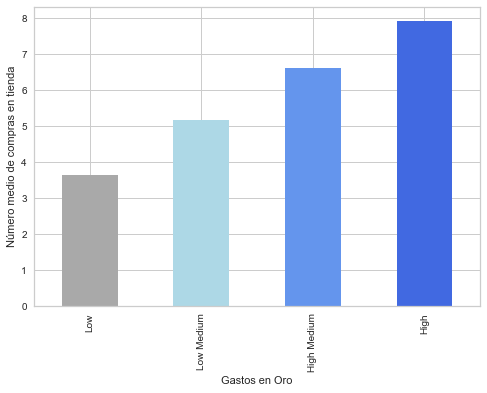

In [93]:
grouped_Oro = df_test.groupby('Gold_rank')['NumStorePurchases'].mean()

# Plot a bar chart
grouped_Oro.plot(kind='bar', color=['darkgrey', 'lightblue', 'cornflowerblue', 'royalblue'])

# Set labels and title
plt.xlabel('Gastos en Oro')
plt.ylabel('Número medio de compras en tienda')
plt.show()

> The rest of this task is performed in RStudio using R

[Return Table of Contents](#Table)

<a id="section_4"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#59C1BD;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align:center;
          color:white;">
          TASK 3: DATA VISUALIZATION 
</p>
</div>

### Question 1: ¿Qué campaña de marketing tiene más éxito?

<AxesSubplot:title={'center':'Marketing Campaigns Efficiency'}, xlabel='Campaigns', ylabel='Number of Customers Joined'>

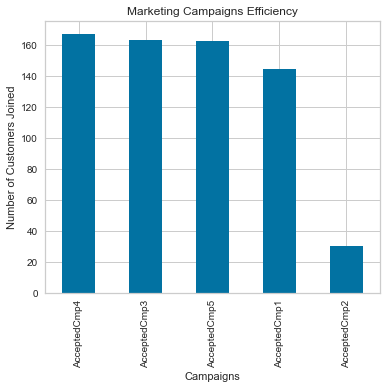

In [94]:
campaigns = ['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2']
dfg = dataset[campaigns].sum().sort_values(ascending=False)
dfg.plot(kind='bar', title='Marketing Campaigns Efficiency', ylabel='Number of Customers Joined',
         xlabel='Campaigns', figsize=(6, 5))

> => Campaign 4 is most effective, attracted the most number of clients to join

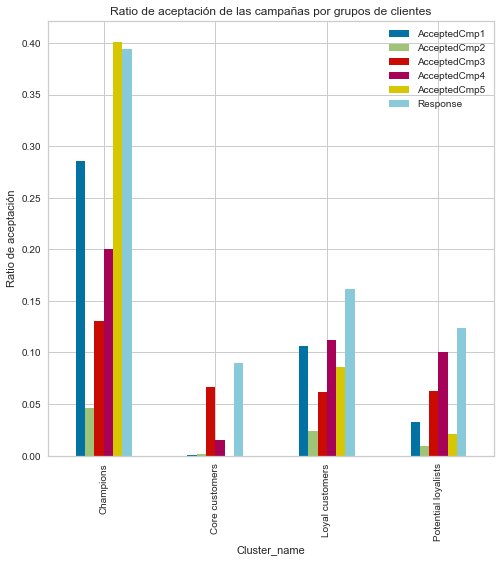

In [95]:
cmp_cluster.plot(kind='bar', figsize=(8,8))
plt.ylabel("Ratio de aceptación")
plt.title("Ratio de aceptación de las campañas por grupos de clientes")
plt.show()

> It can be seen from the graphs that for the **"Loyal Customers"**, **"Core"** and **"Potential"** groups the most responsive clients to the "Response" campaign, meanwhile, among the **"Champion"** group, the 5th campaign is the most successful, followed by "Response". In general, the last campaign ("Response") has a better response from consumers than the rest of the campaigns carried out by the company.

### Question 2: Describe the company's average customer

> **This question can be interpreted by 3 ways:**
 - First of all, we can have a deeper look in the group of customers with the average total spending. As previously specified, in the case of 4 clusters segmentation, they are those that belong to the "Loyal Customers" group. 
 - Another way to answer the question would be to look at the biggest client cluster, which are the "Core customers" in this context with a total of 1070 consumer.
 - Finally, the average customer of the company could be defined by finding the 29 average values of the main variables to define consumers. Therefore, in this way, the client has the following characteristics: an income of 51958 monetary units, 46 years old and with at least one child. In addition, its average expenditure is 606 monetary units, its total number of purchases is 15 and it has a postgraduate level. As for their buying behavior, they make more purchases through the store and the website and usually do so at least once a month.

In [96]:
dataset[['Education', 'Income','Recency','Frequency', 'Monetary','Seniority','Age', 'Children','Kidhome', 'Teenhome', 'Has_child']].mean()

Education       3.46
Income      51968.26
Recency        49.12
Frequency       1.11
Monetary      605.99
Seniority      18.20
Age            46.10
Children        0.95
Kidhome         0.44
Teenhome        0.51
Has_child       0.72
dtype: float64

### Question 3: Which products are selling better?

<AxesSubplot:title={'center':'Gastos por categoría de productos'}, xlabel='Products', ylabel='Gastos total'>

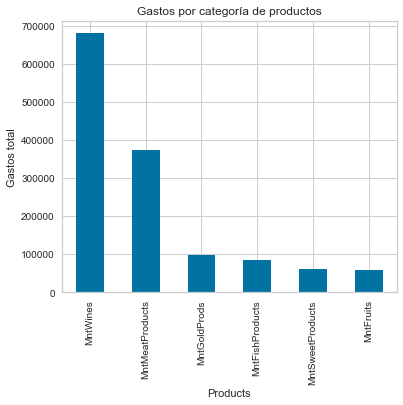

In [97]:
Product_type = ['MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df_P = dataset[Product_type].sum().sort_values(ascending=False)
df_P.plot(kind='bar', title='Gastos por categoría de productos', ylabel='Gastos total',
         xlabel='Products', figsize=(6, 5))

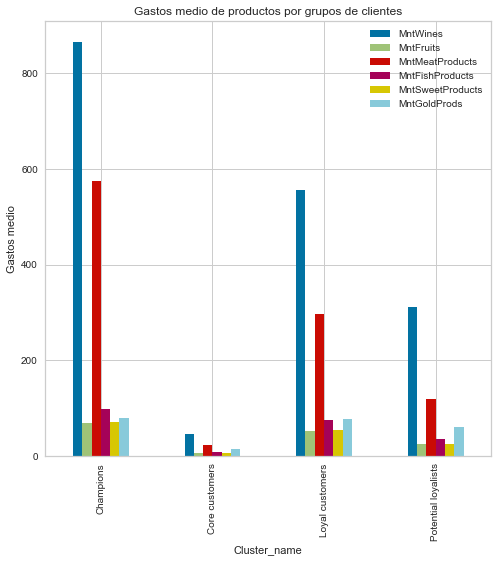

In [98]:
cluster_centroid[Product_type].plot(kind='bar', figsize=(8,8))
plt.ylabel("Gastos medio")
plt.title("Gastos medio de productos por grupos de clientes")
plt.show()

> As can be seen in presented figures, the most purchased product, out of all categories, is wine although the amount spent in the "Core" group is significantly lower.

### Question 4: Which channels are underperforming?

<AxesSubplot:title={'center':'Marketing Campaigns Efficiency'}, xlabel='Campaigns', ylabel='Number of Customers Joined'>

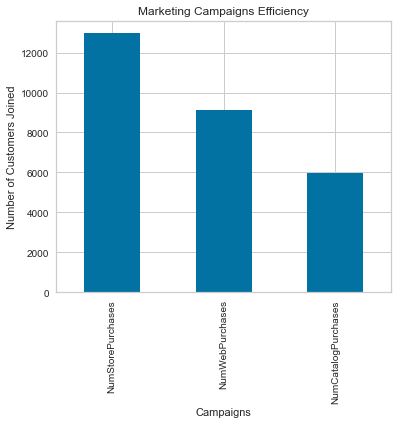

In [99]:
channels = ['NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases']
df_C = dataset[channels].sum().sort_values(ascending=False)
df_C.plot(kind='bar', title='Marketing Campaigns Efficiency', ylabel='Number of Customers Joined',
         xlabel='Campaigns', figsize=(6, 5))

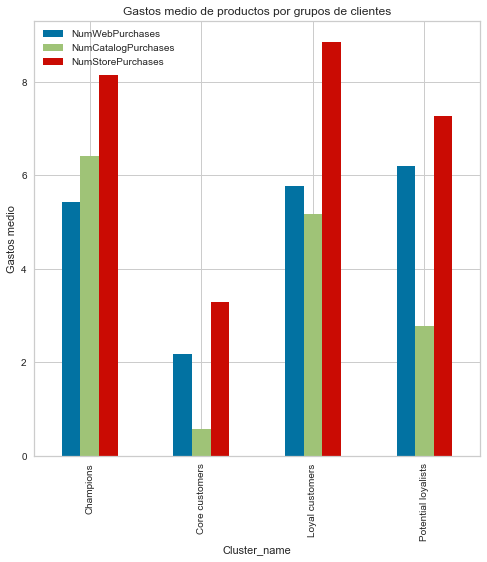

In [100]:
cluster_centroid[channels].plot(kind='bar', figsize=(8,8))
plt.ylabel("Gastos medio")
plt.title("Gastos medio de productos por grupos de clientes")
plt.show()

> As for the sales channels, the channel with the lowest performance, in general, is through the catalog. In addition, when studying the behavior of the different groups of customers with respect to the method of purchase, it can be seen that the channel with the lowest performance in the groups called "Loyal Customers", "Core" and "Potential" is also by category. However, for the "Champions" group, the channel with the lowest performance would be the website.

[Return Table of Contents](#Table)

<a id="section_5"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#59C1BD;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align:center;
          color:white;">
          RECOMMENDATIONS AND CONCLUSION 
</p>
</div>

> Base on the performed analysis, different recommendations are made with the aim of improving the company's results and customers' satisfaction.

### General recomendations

 - First of all, the products with the least positive response is the gold category, but this category is most purchased through the traditional sales channel, which is in physical stores. Therefore, with the intention of improving in-store sales, combined discounts could be made on gold items and the other product categories. With regard to the relationship between wine and meat mentioned in previous sections and considering the success of this product combination with the customers, it is recommended to offer a combo discount on fish and fruit. 
***
 - On the other hand, it is observed that some campaigns have gained success with specific groups of clients based on their income level, for example, Campaign 5 has a better response among people with higher incomes and Campaign 3 for individuals who earn the least. Consequently, it is considered that more customized campaigns for different income levels should be carried out over time with the aim of reaching all types of customers. 
 ***
 - Moreover, the most successful channel is the tradition channel through physical stores. To improve the performance of the rest of the channels, you can make cross-channel promotions; In other words, if they have in-store purchases of more than 40 euros, customers can get a coupon of 30% on purchases by catalog or website. 
 ***
 - Finally, given the lack of effective connection between current campaigns and customer preferences in each region, a more detailed assessment is recommended to understand the specific needs and expectations of each country. Therefore, it would be necessary to consider socio-cultural and economic factors that may influence the consumer. If not, since the current investment does not generate the desired results, the elimination of expenditure on regional marketing campaign could also be considered.


### Recommendations based on customer segmentation

> Knowing the characteristics and attributes of the four groups clients in the previous section, some personalized marketing strategies are recommended through new campaigns aimed at each consumer segment.

 - The first group, the "Champions", are customers who have recently shopped with high frequency and a large amount of expenditure and who have actively interacted with past campaigns. Therefore, in order for them to feel valued, they must be rewarded with exclusive offers or early access to new products. In addition, this group buys more by catalog and in stores, so offers should focus on these two channels.
 ***
 - Regards to the "Loyal Customers" group, which is made up of old consumers with the highest in-store spending, personalized discounts could be made in stores. In addition, since "Loyal Customers" often have young children, the option of creating a combo of discounts on products for children could be considered, for example, a 3x2 combo on baby food is recommended.
 *** 
 - On the other hand, the "Potential Loyalist" group has average expenses and usually buys on the website. As a result, a points and rewards program and online membership program could be launched to promote their shopping habits and thus continue to become "Loyal Customers". In addition, the opinions and comments of this group are very useful to improve the satisfaction and shopping experience of customers in the web channel. Therefore, another possible marketing strategy could be to collect customer reviews and analyze them using Natural Language Processing (NPL).
 ***
 - Finally, almost 48% of the company's customer database is within the "Core Customers" group. Therefore, it is important to find a suitable strategy to retain this segment of consumers. It is known that they are the youngest customers and that they visit the website very often, but have not made many purchases. For this reason, and in order to help them make the decision to purchase products, a limited-time promotion could be displayed every time they enter the website or by sending personalized offers to their emails based on their search history.

[Return Table of Contents](#Table)